In [ ]:
# Data Manipulation
import numpy as np
import pandas as pd
import functools as ft
import json as js
import re

# API's
from binance.client import Client
from binance.enums import *
import tweepy

# Interact with Operating System
import os

# Graphs
import matplotlib.pyplot as plt
from wordcloud import WordCloud
pd.options.plotting.backend = "plotly" # To use plotly 

# Preprocess and models
import nltk
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Others
from criptos import clean_tokenize, klines_to_df


# Warnings Configurations
import warnings
warnings.filterwarnings('ignore')

**Steps**
1. Bitcoin History
2. Get tweets
3. Preprocessing Tweets
4. Exploratory Analysis of tweets
5. Sentiment Analysis

**Questions**
1. Could be a good idea try to get all BTC tweets? not only from elon musk
2. In dash try to implemente tath for one user get all the analysis

# 1 Bitcoin History

**Steps**
1. Connect to Binance API
2. Download the Prices of BTC/USDT
3. Prices to .csv

## 1.2 Binance API

In [2]:
# Path
path = r"C:\Users\ferro\Desktop\VeranoCIMAT\Análisis de Sentimiento"

In [3]:
# Loading credencials for the binance API
binance_cred = "credentials_binance.json"
cred = js.load(open(os.path.join(path, "credentials", binance_cred), "rb"))
API_KEY = cred["API_KEY"]
API_SECRET = cred["API_SECRET"]

In [4]:
# Conecting API (Se puede entrar sin las API_Key)
client = Client(API_KEY, API_SECRET, tld = "com")

In [5]:
# Conecting API without credentials
#client = Client()

## 1.2 Download Data

Get daily prices of Bitcoin since  **1 Jan, 2018** until **1 Jun, 2021** the close hour is **23:59 UTC**. The par is **BTC/USDT**

In [6]:
# Getting candles
interval_cand = '1d'
par_1 = "BTC"
par_2 = "USDT"
par = "".join([par_1, par_2])
start = "1 Jan, 2018"
end = "1 Jun, 2021"
candles = client.get_historical_klines(symbol = par, interval = interval_cand,
                                      start_str = start, end_str = end) # Get Prices
candles = klines_to_df(candles)
 
candles.head()

,Open_time,Open,High,Low,Close,Volume,Close_time,Quote_asset_volume,Number_of_trades,Taker_buy_base_asset_volume,Taker_buy_quote_asset_volume,Can_be_ignored
0,2017-12-31 18:00:00,13715.650391,13818.549805,12750.000000,13380.000000,8609.91584400,2018-01-01 17:59:59.999,114799747.44197057,105595,3961.93894600,52809747.44038045,0
1,2018-01-01 18:00:00,13382.160156,15473.490234,12890.019531,14675.110352,20078.09211100,2018-01-02 17:59:59.999,279717107.43371920,177728,11346.32673900,158080088.68331682,0
2,2018-01-02 18:00:00,14690.000000,15307.559570,14150.000000,14919.509766,15905.66763900,2018-01-03 17:59:59.999,236116868.33619011,162787,8994.95356600,133587333.24534808,0
3,2018-01-03 18:00:00,14919.509766,15280.000000,13918.040039,15059.540039,21329.64957400,2018-01-04 17:59:59.999,312781583.79830782,170310,12680.81295100,186116793.01158931,0
4,2018-01-04 18:00:00,15059.559570,17176.240234,14600.000000,16960.390625,23251.49112500,2018-01-05 17:59:59.999,369321956.48683753,192969,13346.62229300,211829900.67898224,0


Text(0, 0.5, 'USDT')

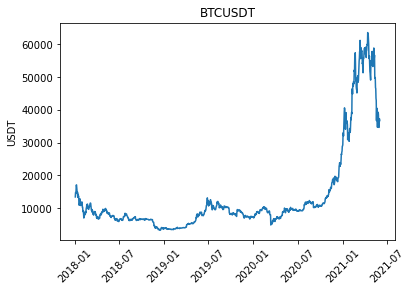

In [7]:
plt.plot(candles["Close_time"], candles["Close"])
plt.xticks(rotation=45)
plt.title(par)
plt.ylabel(par_2)

In [8]:
candles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248 entries, 0 to 1247
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Open_time                     1248 non-null   datetime64[ns]
 1   Open                          1248 non-null   float32       
 2   High                          1248 non-null   float32       
 3   Low                           1248 non-null   float32       
 4   Close                         1248 non-null   float32       
 5   Volume                        1248 non-null   object        
 6   Close_time                    1248 non-null   datetime64[ns]
 7   Quote_asset_volume            1248 non-null   object        
 8   Number_of_trades              1248 non-null   int32         
 9   Taker_buy_base_asset_volume   1248 non-null   object        
 10  Taker_buy_quote_asset_volume  1248 non-null   object        
 11  Can_be_ignored                

In [9]:
# No missing values
candles.isna().sum()

Open_time                       0
Open                            0
High                            0
Low                             0
Close                           0
Volume                          0
Close_time                      0
Quote_asset_volume              0
Number_of_trades                0
Taker_buy_base_asset_volume     0
Taker_buy_quote_asset_volume    0
Can_be_ignored                  0
dtype: int64

In [10]:
# This is for Dash
#cryptos = ["BTC", "ETH", "LTC", "ADA", "SHIB", "XRP", "MANA"]
#for crypto in cryptos:
#    interval_cand = '1d'
#    par_1 = crypto
#    par_2 = "USDT"
#    par = "".join([par_1, par_2])
#    start = "1 Jan, 2018"
#    end = "1 Jun, 2021"
#    candles_aux = client.get_historical_klines(symbol = par, interval = interval_cand,
#                                          start_str = start, end_str = end) # Get Prices
#    candles_aux = klines_to_df(candles_aux)
#    candles_aux.to_csv(os.path.join(path, "data_dash", "1_" + crypto + ".csv"))

## 1.3 Save Data

In [11]:
candles.head()

,Open_time,Open,High,Low,Close,Volume,Close_time,Quote_asset_volume,Number_of_trades,Taker_buy_base_asset_volume,Taker_buy_quote_asset_volume,Can_be_ignored
0,2017-12-31 18:00:00,13715.650391,13818.549805,12750.000000,13380.000000,8609.91584400,2018-01-01 17:59:59.999,114799747.44197057,105595,3961.93894600,52809747.44038045,0
1,2018-01-01 18:00:00,13382.160156,15473.490234,12890.019531,14675.110352,20078.09211100,2018-01-02 17:59:59.999,279717107.43371920,177728,11346.32673900,158080088.68331682,0
2,2018-01-02 18:00:00,14690.000000,15307.559570,14150.000000,14919.509766,15905.66763900,2018-01-03 17:59:59.999,236116868.33619011,162787,8994.95356600,133587333.24534808,0
3,2018-01-03 18:00:00,14919.509766,15280.000000,13918.040039,15059.540039,21329.64957400,2018-01-04 17:59:59.999,312781583.79830782,170310,12680.81295100,186116793.01158931,0
4,2018-01-04 18:00:00,15059.559570,17176.240234,14600.000000,16960.390625,23251.49112500,2018-01-05 17:59:59.999,369321956.48683753,192969,13346.62229300,211829900.67898224,0


In [12]:
# No missing prices between dates
pd.date_range(start = '2018-01-01', end = '2021-06-01' ).difference(pd.to_datetime(candles["Open_time"].apply(lambda x: x.strftime("%Y-%m-%d"))))

DatetimeIndex(['2021-06-01'], dtype='datetime64[ns]', freq=None)

In [13]:
# Change and Select Columns
candles = candles[["Open_time", "Close", "Volume"]]
candles.columns = ["date", "close", "volume"]
candles

,date,close,volume
0,2017-12-31 18:00:00,13380.000000,8609.91584400
1,2018-01-01 18:00:00,14675.110352,20078.09211100
2,2018-01-02 18:00:00,14919.509766,15905.66763900
3,2018-01-03 18:00:00,15059.540039,21329.64957400
4,2018-01-04 18:00:00,16960.390625,23251.49112500
...,...,...,...
1243,2021-05-27 19:00:00,35663.488281,135377.62972000
1244,2021-05-28 19:00:00,34605.148438,112663.09268900
1245,2021-05-29 19:00:00,35641.269531,73535.38696700
1246,2021-05-30 19:00:00,37253.808594,94160.73528900


In [14]:
# Prices to .csv
candles.to_csv(os.path.join(path, "data", "prices.csv"))

In [15]:
candles

,date,close,volume
0,2017-12-31 18:00:00,13380.000000,8609.91584400
1,2018-01-01 18:00:00,14675.110352,20078.09211100
2,2018-01-02 18:00:00,14919.509766,15905.66763900
3,2018-01-03 18:00:00,15059.540039,21329.64957400
4,2018-01-04 18:00:00,16960.390625,23251.49112500
...,...,...,...
1243,2021-05-27 19:00:00,35663.488281,135377.62972000
1244,2021-05-28 19:00:00,34605.148438,112663.09268900
1245,2021-05-29 19:00:00,35641.269531,73535.38696700
1246,2021-05-30 19:00:00,37253.808594,94160.73528900


# 2 Get Tweets

**Steps**
1. Get tweets of last week (about BTC) 
2. Top 20 popular users of step **1**
3. Get tweets (about BTC) of the top 

For **3** we get tweets since **1 Jan, 2018** until **1 Jun, 2021**. The next sections are in the apendix.

## 2.1 Get tweets of last week

## 2.2 Top popular users (related to BTC)

## 2.3 Get tweets for each top user (Run Once)

In [ ]:
# Path
path = r"C:\Users\ferro\Desktop\VeranoCIMAT\Análisis de Sentimiento"

In [ ]:
# Load user and followers
df = pd.read_csv(os.path.join(path, "data", "user_followers.csv"))
df = df.drop(columns = ["Unnamed: 0"])
df.columns = ["username", "followers"]

In [ ]:
# Top 20 popular users
top = 20
top_users = df.sort_values(by = ["followers"], ascending = False).head(top).reset_index(drop = True)
top_users

In [ ]:
# This is to avoid the loop in twint, i can omit it in spyder
import nest_asyncio
nest_asyncio.apply()

In [ ]:
# Delete all files in a directory
def delete_files(path):
    for file in os.listdir(path):
        if os.path.exists(os.path.join(path, file)):
            os.remove(os.path.join(path, file))
    return print("Files: ", os.listdir(path))

In [ ]:
import twint

# Get tweets from different users and different words
def scrape_tweets(users, words, path, date_since, date_until):
    for name in users:
        for word in words:
            # Scraping for tweets
            c = twint.Config()
            c.Username = name
            c.Since = date_since 
            c.Until = date_until
            c.Search = word
            c.Store_csv = True
            c.Output = os.path.join(path, name + "_" + word + ".csv")
            twint.run.Search(c)
    return print("Files: ", os.listdir(path))

In [41]:
# Path and users
users = top_users["username"].values

# Tweets period
date_since = "2017-12-31"
date_until = "2021-06-02"

# Words to search 
words = ["bitcoin", "btc", "crypto", "cryptocurrencies", "cryptos"] # Busca palabras aunque esten en minusculas o mayusculas

In [42]:
# Delete all files in the path
delete_files(os.path.join(path, "data", "user_tweets"))

Files:  []


In [ ]:
scrape_tweets(users, words, os.path.join(path, "data", "user_tweets"), date_since, date_until)

# 3 Preprocessing tweets

## 3.1 Formatting variables

The csv contain all the tweets related to BTC of top users.

In [2]:
# Path
path = r"C:\Users\ferro\Desktop\VeranoCIMAT\Análisis de Sentimiento"

In [3]:
# Reading csv's files and only useful columns
col_useful = ["username", "created_at", "tweet", "language"]
path_tweets = os.path.join(path, "data", "user_tweets")
tweets_list = [pd.read_csv(os.path.join(path_tweets, file), usecols = col_useful) for file in os.listdir(path_tweets)]
tweets_list[0].head()

,created_at,username,tweet,language
0,2021-05-31 08:44:00 Hora de verano central (Mé...,actualidadrt,¿Por qué el inversor Robert Kiyosaki considera...,es
1,2021-05-29 22:36:00 Hora de verano central (Mé...,actualidadrt,"""El dólar estadounidense ya está en un periodo...",es
2,2021-05-29 10:19:00 Hora de verano central (Mé...,actualidadrt,El bitcóin cae a su nivel más bajo de esta sem...,es
3,2021-05-29 07:00:18 Hora de verano central (Mé...,actualidadrt,El bitcóin cae a su nivel más bajo de esta sem...,es
4,2021-05-26 06:10:00 Hora de verano central (Mé...,actualidadrt,El bitcóin supera la barrera de los 40.000 dól...,es


In [4]:
# Concate tweets data frames and selecting only english tweets
tweets_df = ft.reduce(lambda x, y: pd.concat([x, y], ignore_index = True), tweets_list)
tweets_df = tweets_df[tweets_df["language"] == "en"].reset_index(drop = True).drop("language", axis = 1)
tweets_df = tweets_df[~tweets_df["username"].isin(["la_patilla", "globovision", "le_figaro"])] # la_patilla is in es but is registered as en, this is an ERROR
tweets_df.head() 

,created_at,username,tweet
0,2021-05-26 20:05:00 Hora de verano central (Mé...,ancalerts,"Bitcoin edges back from $40,000 as volatility ..."
1,2021-05-26 01:40:00 Hora de verano central (Mé...,ancalerts,Bitcoin mining can wane in China as green conc...
2,2021-05-24 20:08:59 Hora de verano central (Mé...,ancalerts,HSBC CEO says Bitcoin not for us https://t.co...
3,2021-05-24 08:20:00 Hora de verano central (Mé...,ancalerts,Crypto miners halt China business after Beijin...
4,2021-05-23 19:21:33 Hora de verano central (Mé...,ancalerts,Bitcoin down almost 50 percent from year's hig...


In [5]:
# Drop duplicated tweets
#tweets_df = tweets_df.iloc[tweets_df.tweet.drop_duplicates().index]
tweets_df.tweet.drop_duplicates(inplace = True)

In [6]:
# Rename useful columns
tweets_df.columns = ["date", "user", "tweet"]
tweets_df.head(5)

,date,user,tweet
0,2021-05-26 20:05:00 Hora de verano central (Mé...,ancalerts,"Bitcoin edges back from $40,000 as volatility ..."
1,2021-05-26 01:40:00 Hora de verano central (Mé...,ancalerts,Bitcoin mining can wane in China as green conc...
2,2021-05-24 20:08:59 Hora de verano central (Mé...,ancalerts,HSBC CEO says Bitcoin not for us https://t.co...
3,2021-05-24 08:20:00 Hora de verano central (Mé...,ancalerts,Crypto miners halt China business after Beijin...
4,2021-05-23 19:21:33 Hora de verano central (Mé...,ancalerts,Bitcoin down almost 50 percent from year's hig...


In [7]:
# Date type
tweets_df["date"] = pd.to_datetime(tweets_df["date"].apply(lambda text: text[0:10]))
tweets_df.head(5)

,date,user,tweet
0,2021-05-26,ancalerts,"Bitcoin edges back from $40,000 as volatility ..."
1,2021-05-26,ancalerts,Bitcoin mining can wane in China as green conc...
2,2021-05-24,ancalerts,HSBC CEO says Bitcoin not for us https://t.co...
3,2021-05-24,ancalerts,Crypto miners halt China business after Beijin...
4,2021-05-23,ancalerts,Bitcoin down almost 50 percent from year's hig...


## 3.2 Clean and Tokenization

Clean and tokenization for all users

In [8]:
# Load stop-words
stop_words = list(stopwords.words('english'))

# Add new stop-words like "it’s" instead of "it's"
new_words = [re.sub("'", "’", word) for word in stop_words if "'" in word]
stop_words.extend(new_words)

In [9]:
# Clean and tokenize tweets
tweets_tokenize = tweets_df.copy()
tweets_tokenize["tweet"] = tweets_tokenize["tweet"].apply(lambda x: clean_tokenize(x, stop_words))
tweets_tokenize.head()

,date,user,tweet
0,2021-05-26,ancalerts,"[bitcoin, edges, back, volatility, lingers]"
1,2021-05-26,ancalerts,"[bitcoin, mining, wane, china, green, concerns..."
2,2021-05-24,ancalerts,"[hsbc, ceo, says, bitcoin]"
3,2021-05-24,ancalerts,"[crypto, miners, halt, china, business, beijin..."
4,2021-05-23,ancalerts,"[bitcoin, almost, percent, year, high]"


In [10]:
# Token in each row, we drop na
tweets_tokenize_explode = tweets_tokenize.explode(column='tweet').reset_index(drop = True).dropna()
tweets_tokenize_explode.head()

,date,user,tweet
0,2021-05-26,ancalerts,bitcoin
1,2021-05-26,ancalerts,edges
2,2021-05-26,ancalerts,back
3,2021-05-26,ancalerts,volatility
4,2021-05-26,ancalerts,lingers


In [11]:
# Add new column in tweets_df to identify tweets realted to bitcoin
key_words = ["bitcoin", "btc"]
tweets_df["key_word"] = tweets_tokenize.tweet.apply(lambda tweet: any(word in tweet for word in key_words))
tweets_df.head()

,date,user,tweet,key_word
0,2021-05-26,ancalerts,"Bitcoin edges back from $40,000 as volatility ...",True
1,2021-05-26,ancalerts,Bitcoin mining can wane in China as green conc...,True
2,2021-05-24,ancalerts,HSBC CEO says Bitcoin not for us https://t.co...,True
3,2021-05-24,ancalerts,Crypto miners halt China business after Beijin...,True
4,2021-05-23,ancalerts,Bitcoin down almost 50 percent from year's hig...,True


# 4 Exploratory analysis

**Steps**
1. Clean tweets: drop links and @users
2. Calculate score with VADER
3. Calculate mean score for each day

## 4.1 Month Activity

In [12]:
# Month activity (Number of tweets in the month)
tweets_df["month"] = pd.to_datetime(tweets_df["date"].dt.strftime("%Y-%m"))
tweets_df

,date,user,tweet,key_word,month
0,2021-05-26,ancalerts,"Bitcoin edges back from $40,000 as volatility ...",True,2021-05-01
1,2021-05-26,ancalerts,Bitcoin mining can wane in China as green conc...,True,2021-05-01
2,2021-05-24,ancalerts,HSBC CEO says Bitcoin not for us https://t.co...,True,2021-05-01
3,2021-05-24,ancalerts,Crypto miners halt China business after Beijin...,True,2021-05-01
4,2021-05-23,ancalerts,Bitcoin down almost 50 percent from year's hig...,True,2021-05-01
...,...,...,...,...,...
13812,2018-08-22,vanguardngrnews,Hackers target smartphones to mine cryptocurre...,False,2018-08-01
13813,2018-05-14,vanguardngrnews,Cryptocurrencies hit dead end===has been publi...,False,2018-05-01
13814,2018-01-25,vanguardngrnews,Investors in cryptocurrencies are gamblers — E...,False,2018-01-01
13815,2018-01-22,vanguardngrnews,Largest Nordic bank Nordea bans employees’ bit...,True,2018-01-01


In [ ]:
# Month activity for each user 
tweets_df.assign(n = 1).pivot_table(values = "n",  index = "month", columns = "user", aggfunc = np.sum).plot()

In [14]:
# This is for Dash
tweets_df.assign(n = 1).pivot_table(values = "n",  index = "month", columns = "user", aggfunc = np.sum).to_csv(os.path.join(path, "data_dash", "2_activity.csv"))

## 4.2 Most Frequent Words

In [38]:
user = "elonmusk"
top = 10 # Avoi greater than 10

In [ ]:
# Plot Top 10 most frequent words
tweets_freq = tweets_tokenize_explode[tweets_tokenize_explode["user"] == user].groupby(by = "tweet")["tweet"].count().sort_values(ascending = False)
tweets_freq[0:top].plot.bar()

In [55]:
# This is for Dash
tweets_tokenize_explode.to_csv(os.path.join(path, "data_dash", "3_frequent_words.csv"), index = False)

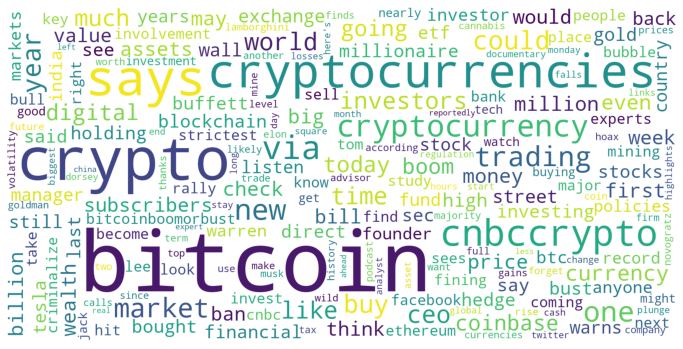

In [41]:
# Plot Word Cloud of tweets frequencies, this class ignore emojis
wordcloud = WordCloud(width = 1600, 
                      height = 800, 
                      max_font_size = 200, 
                      background_color="white").generate_from_frequencies(tweets_freq.to_dict())

# plt the image generated by WordCloud class
plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('{}.png'.format(user))
plt.show()

In [44]:
for user in tweets_tokenize_explode["user"].unique():
    tweets_freq = tweets_tokenize_explode[tweets_tokenize_explode["user"] == user].groupby(by = "tweet")["tweet"].count().sort_values(ascending = False)
    # Plot Word Cloud of tweets frequencies, this class ignore emojis
    wordcloud = WordCloud(width = 1600, 
                          height = 800, 
                          max_font_size = 200, 
                          background_color="white").generate_from_frequencies(tweets_freq.to_dict())

    # plt the image generated by WordCloud class
    wordcloud.to_file(os.path.join(path, "data_dash", "4_wordcloud", user + ".png"))

## 4.3 Words Average in Tweets

In [45]:
# Tweets words
tweets_tokenize["length_tweet"] = tweets_tokenize["tweet"].apply(len)
tweets_tokenize.groupby(["user"])["length_tweet"].agg([np.mean, np.median, np.std])

,mean,median,std
user,,,
ancalerts,9.834906,7.0,6.260999
binance,14.643265,14.0,8.182109
business,9.626004,9.0,4.316313
businessinsider,8.825108,8.0,3.962544
cnbc,10.938453,10.0,4.596392
cz_binance,12.025199,11.0,7.102412
dolartoday,10.000000,10.0,NaN
elonmusk,10.547619,7.5,7.461127
emreaydin,2.000000,2.0,0.000000


In [59]:
# This is for Dash
tweets_tokenize.groupby(["user"])["length_tweet"].agg([np.mean]).to_csv(os.path.join(path, "data_dash", "5_mean_words.csv"))

In [ ]:
tweets_tokenize.groupby(["user"])["length_tweet"].agg([np.mean]).plot.bar()

In [ ]:
# Words average in each month
tweets_tokenize["month"] = pd.to_datetime(tweets_tokenize["date"].dt.strftime("%Y-%m"))
tweets_tokenize.pivot_table(index = "month", columns = "user", values = "length_tweet", aggfunc = np.mean).plot()

# 5 Sentiment Analysis

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. It is fully open-sourced under the [MIT License] (we sincerely appreciate all attributions and readily accept most contributions, but please don’t hold us liable).

If you use either the dataset or any of the VADER sentiment analysis tools (VADER sentiment lexicon or Python code for rule-based sentiment analysis engine) in your research, please cite the above paper. For example:

Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

In [62]:
analyzer = SentimentIntensityAnalyzer()

In [63]:
def clean_text(text):
    # Drop http web pages
    new_text = re.sub('http\S+', ' ', text)

    # Drop @users
    new_text = re.sub('@[^\s]+', ' ', new_text)
    
    return new_text

In [64]:
# tweets related to bitcoin
tweets_analysis = tweets_df.copy()

In [65]:
# Polarity scores
scores = pd.DataFrame(tweets_analysis["tweet"].apply(lambda x: analyzer.polarity_scores(clean_text(x))).values.tolist())
scores.head()

,neg,neu,pos,compound
0,0.000,1.000,0.0,0.0000
1,0.264,0.736,0.0,-0.5106
2,0.000,1.000,0.0,0.0000
3,0.000,1.000,0.0,0.0000
4,0.000,1.000,0.0,0.0000


In [66]:
# Concate DataFrames
tweets_analysis = pd.concat([tweets_analysis, scores], axis = 1)
tweets_analysis.head()

,date,user,tweet,key_word,month,neg,neu,pos,compound
0,2021-05-26,ancalerts,"Bitcoin edges back from $40,000 as volatility ...",True,2021-05-01,0.000,1.000,0.0,0.0000
1,2021-05-26,ancalerts,Bitcoin mining can wane in China as green conc...,True,2021-05-01,0.264,0.736,0.0,-0.5106
2,2021-05-24,ancalerts,HSBC CEO says Bitcoin not for us https://t.co...,True,2021-05-01,0.000,1.000,0.0,0.0000
3,2021-05-24,ancalerts,Crypto miners halt China business after Beijin...,True,2021-05-01,0.000,1.000,0.0,0.0000
4,2021-05-23,ancalerts,Bitcoin down almost 50 percent from year's hig...,True,2021-05-01,0.000,1.000,0.0,0.0000


In [67]:
# day tweets
tweets_analysis["day"] = pd.to_datetime(tweets_analysis["date"].dt.strftime("%Y-%m-%d"))

In [ ]:
# daily score
daily_sentiment_score = tweets_analysis.groupby(["day"])["compound"].agg([np.mean, np.min, np.max]).copy()
daily_sentiment_score.columns = ["sentiment_mean", "sentiment_amin", "sentiment_amax"]
daily_sentiment_score.plot()

In [44]:
# Save score
daily_sentiment_score.to_csv(os.path.join(path, "data", "daily_sentiment_score.csv"))

In [69]:
# This is for Dash
daily_sentiment_score.to_csv(os.path.join(path, "data_dash", "6_sentiment_score.csv"))